In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('approval_inflation_up_gdp.csv')

In [5]:
data.head()

,President,Date,Approve,Disapprove,Inaug,Days,Inflation,Unemployment Rate,Real GDP Growth (%)
0,Roosevelt,1941-07-22,69,24,1/20/1941,183,NaN,NaN,NaN
1,Roosevelt,1941-07-29,65,25,1/20/1941,190,NaN,NaN,NaN
2,Roosevelt,1941-08-05,68,23,1/20/1941,197,NaN,NaN,NaN
3,Roosevelt,1941-08-19,65,26,1/20/1941,211,NaN,NaN,NaN
4,Roosevelt,1941-08-26,67,24,1/20/1941,218,NaN,NaN,NaN


In [6]:
data.tail()

,President,Date,Approve,Disapprove,Inaug,Days,Inflation,Unemployment Rate,Real GDP Growth (%)
4204,Trump,2017-11-30,34,60,1/20/2017,314,NaN,NaN,4.6
4205,Trump,2017-12-03,35,60,1/20/2017,317,NaN,NaN,NaN
4206,Trump,2017-12-06,37,59,1/20/2017,320,NaN,NaN,NaN
4207,Trump,2017-12-09,36,59,1/20/2017,323,NaN,NaN,NaN
4208,Trump,2017-12-12,36,59,1/20/2017,326,NaN,NaN,NaN


<h3>Convert date frequency
</h3>


In [19]:
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)
monthly_approval = data[['Approve', 'Disapprove']].resample('MS').mean()
monthly_president = data[['President']].resample('MS').last()
monthly_data = monthly_president.join(monthly_approval)
monthly_data[['Approve', 'Disapprove']] = monthly_data[['Approve', 'Disapprove']].interpolate(method='linear')
monthly_data['President'] = monthly_data['President'].ffill()


In [20]:
monthly_data.head(10)

,President,Approve,Disapprove
Date,,,
1941-07-01,Roosevelt,67.000000,24.500000
1941-08-01,Roosevelt,66.666667,24.333333
1941-09-01,Roosevelt,70.000000,23.500000
1941-10-01,Roosevelt,73.250000,20.125000
1941-11-01,Roosevelt,76.500000,16.750000
1941-12-01,Roosevelt,79.750000,13.375000
1942-01-01,Roosevelt,83.000000,10.000000
1942-02-01,Roosevelt,78.000000,13.000000
1942-03-01,Roosevelt,74.500000,14.500000


<h4>Federal Reserve Economic Data</h4>

In [22]:
!pip install pandas-datareader


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas_datareader.data as web
import datetime


In [24]:
start_date = datetime.datetime(1941, 1, 1)
end_date = datetime.datetime(2017, 12, 31)

In [25]:
fred_codes = {
    'Unemployment Rate': 'UNRATE',
    'Inflation_CPI_Index': 'CPIAUCSL', # We will convert this to % change
    'Real GDP Growth': 'A191RL1Q225SBEA' # This is quarterly
}

In [26]:
economic_data_raw = web.DataReader(fred_codes.values(), 'fred', start_date, end_date)
economic_data_raw.columns = fred_codes.keys()

In [27]:

economic_data_raw['Inflation'] = economic_data_raw['Inflation_CPI_Index'].pct_change(12) * 100

# 2. GDP Growth: This is quarterly. We must 'forward-fill' it so that
#    the value for Q1 (released in April) applies to April, May, and June.
economic_data_raw['Real GDP Growth'] = economic_data_raw['Real GDP Growth'].ffill()

# 3. Select our final, clean columns
economic_data = economic_data_raw[['Unemployment Rate', 'Inflation', 'Real GDP Growth']]

In [28]:
economic_data.head(10)

,Unemployment Rate,Inflation,Real GDP Growth
DATE,,,
1947-01-01,NaN,NaN,NaN
1947-02-01,NaN,NaN,NaN
1947-03-01,NaN,NaN,NaN
1947-04-01,NaN,NaN,-1.0
1947-05-01,NaN,NaN,-1.0
1947-06-01,NaN,NaN,-1.0
1947-07-01,NaN,NaN,-0.8
1947-08-01,NaN,NaN,-0.8
1947-09-01,NaN,NaN,-0.8


In [29]:
final_data = monthly_data.join(economic_data)
final_data.dropna(inplace=True)

In [30]:
final_data.head(10)

,President,Approve,Disapprove,Unemployment Rate,Inflation,Real GDP Growth
Date,,,,,,
1948-01-01,Truman,48.750000,36.250000,3.4,10.242086,6.2
1948-02-01,Truman,44.500000,40.500000,3.8,9.481961,6.2
1948-03-01,Truman,40.250000,44.750000,4.0,6.818182,6.2
1948-04-01,Truman,36.000000,49.000000,3.9,8.272727,6.8
1948-05-01,Truman,37.000000,47.000000,3.5,9.384966,6.8
1948-06-01,Truman,38.000000,45.000000,3.6,9.375000,6.8
1948-07-01,Truman,42.142857,41.142857,3.6,9.761583,2.3
1948-08-01,Truman,46.285714,37.285714,3.9,9.062500,2.3
1948-09-01,Truman,50.428571,33.428571,3.8,6.654991,2.3


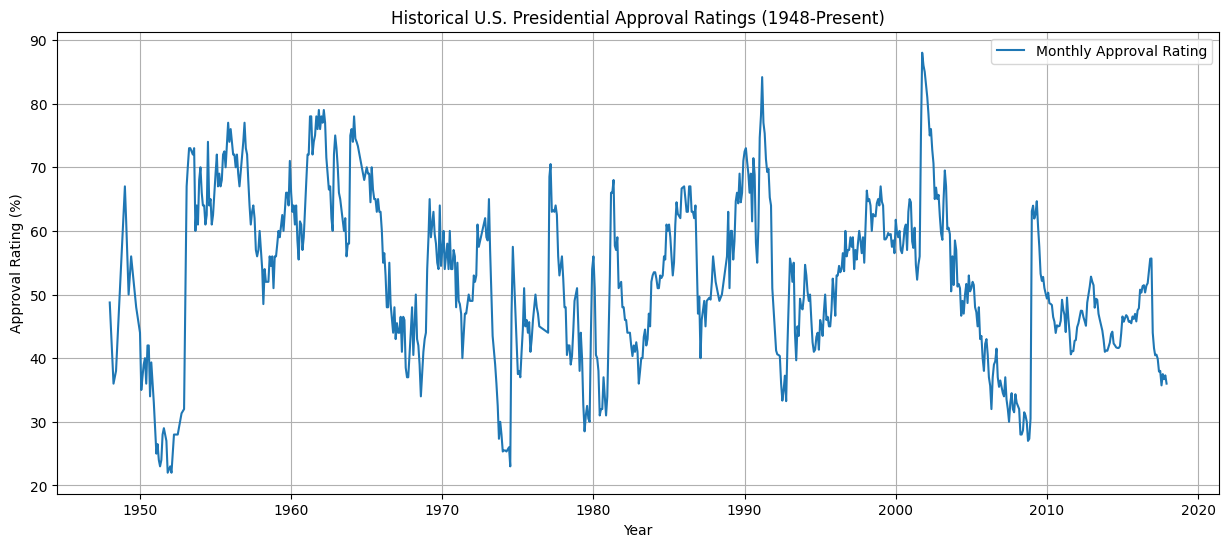

In [31]:

import seaborn as sns

plt.figure(figsize=(15, 6))
plt.plot(final_data['Approve'], label='Monthly Approval Rating')
plt.title('Historical U.S. Presidential Approval Ratings (1948-Present)')
plt.xlabel('Year')
plt.ylabel('Approval Rating (%)')
plt.legend()
plt.grid(True)
plt.show()

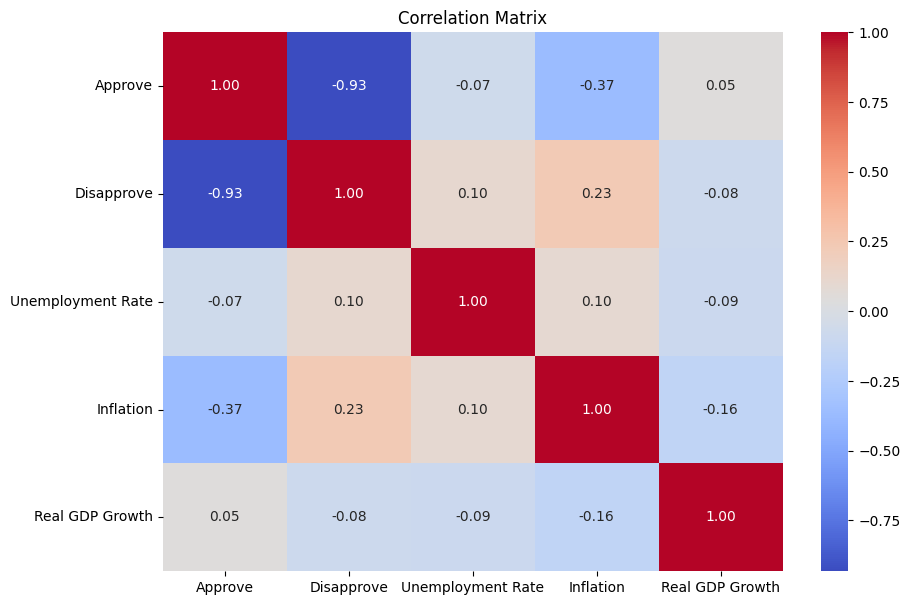

In [32]:
plt.figure(figsize=(10, 7))

sns.heatmap(final_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

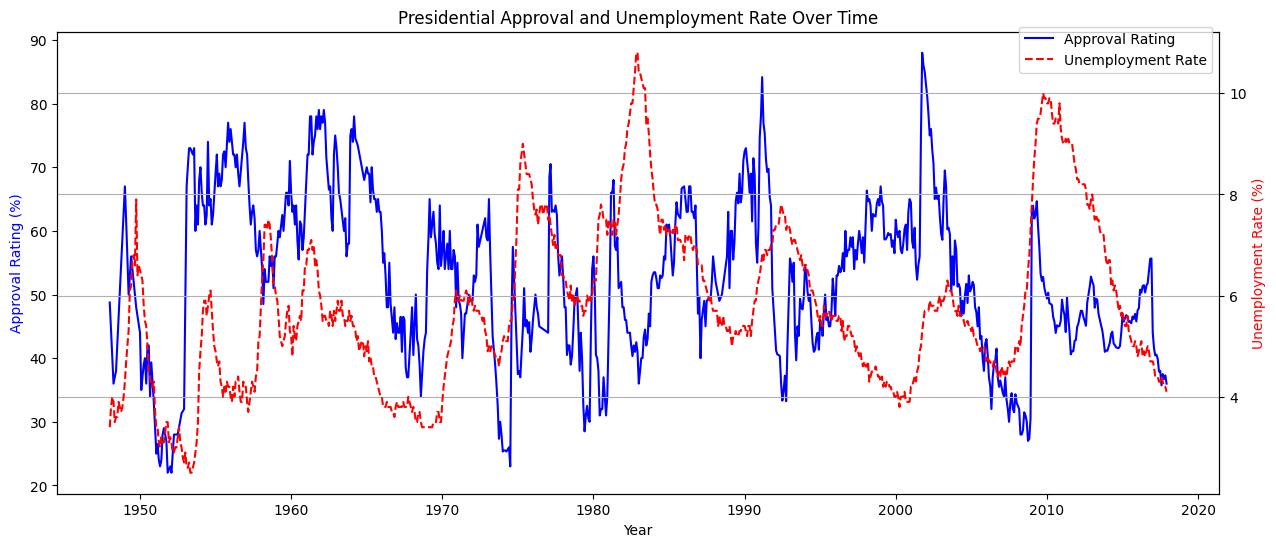

In [33]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot Approval on the left y-axis
ax1.plot(final_data.index, final_data['Approve'], color='blue', label='Approval Rating')
ax1.set_xlabel('Year')
ax1.set_ylabel('Approval Rating (%)', color='blue')

# Create a second y-axis on the right for Unemployment
ax2 = ax1.twinx() 
ax2.plot(final_data.index, final_data['Unemployment Rate'], color='red', label='Unemployment Rate', linestyle='--')
ax2.set_ylabel('Unemployment Rate (%)', color='red')

plt.title('Presidential Approval and Unemployment Rate Over Time')
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))
plt.grid(True)
plt.show()

<h4>Adding a shock variable recession </h4>

In [34]:
start_date = final_data.index.min()
end_date = final_data.index.max()
recession = web.DataReader('USREC', 'fred', start_date, end_date

In [35]:
# Join it to your main DataFrame
final_data_fe = final_data.join(recession)

# Rename the column for clarity
final_data_fe.rename(columns={'USREC': 'Recession'}, inplace=True)

In [36]:
final_data_fe.head()

,President,Approve,Disapprove,Unemployment Rate,Inflation,Real GDP Growth,Recession
Date,,,,,,,
1948-01-01,Truman,48.75,36.25,3.4,10.242086,6.2,0
1948-02-01,Truman,44.50,40.50,3.8,9.481961,6.2,0
1948-03-01,Truman,40.25,44.75,4.0,6.818182,6.2,0
1948-04-01,Truman,36.00,49.00,3.9,8.272727,6.8,0
1948-05-01,Truman,37.00,47.00,3.5,9.384966,6.8,0


<h4>Adding "Lagged" Variables</h4>

In [38]:
#To fix time lag
# Create a 3-month and 6-month lag for your key economic variables
final_data_fe['Unemploy_Lag3'] = final_data_fe['Unemployment Rate'].shift(3)
final_data_fe['Inflation_Lag3'] = final_data_fe['Inflation'].shift(3)
final_data_fe['GDP_Lag1'] = final_data_fe['Real GDP Growth'].shift(1) # GDP is often reported with a lag

In [39]:
final_data_fe.head(5)

,President,Approve,Disapprove,Unemployment Rate,Inflation,Real GDP Growth,Recession,Unemploy_Lag3,Inflation_Lag3,GDP_Lag1
Date,,,,,,,,,,
1948-01-01,Truman,48.75,36.25,3.4,10.242086,6.2,0,NaN,NaN,NaN
1948-02-01,Truman,44.50,40.50,3.8,9.481961,6.2,0,NaN,NaN,6.2
1948-03-01,Truman,40.25,44.75,4.0,6.818182,6.2,0,NaN,NaN,6.2
1948-04-01,Truman,36.00,49.00,3.9,8.272727,6.8,0,3.4,10.242086,6.2
1948-05-01,Truman,37.00,47.00,3.5,9.384966,6.8,0,3.8,9.481961,6.8


<h4>Adding "Honeymoon" Variable</h4>

In [41]:
president_change = final_data_fe['President'] != final_data_fe['President'].shift(1)

change_indices = final_data_fe[president_change].index


final_data_fe['Honeymoon'] = 0


for date in change_indices:
    
    start_index = final_data_fe.index.get_loc(date)
    #
    final_data_fe.iloc[start_index : start_index + 6, final_data_fe.columns.get_loc('Honeymoon')] = 1


print("\n--- Data with Honeymoon Feature (Example) ---")
print(final_data_fe.loc['1980-11-01':'1981-08-01'])


--- Data with Honeymoon Feature (Example) ---
           President    Approve  Disapprove  Unemployment Rate  Inflation  \
Date                                                                        
1980-11-01    Carter  31.000000   56.000000                7.5  12.631579   
1980-12-01    Carter  34.000000   55.000000                7.2  12.353706   
1981-01-01    Carter  43.500000   35.000000                7.5  11.794872   
1981-02-01    Reagan  53.000000   15.000000                7.4  11.392405   
1981-03-01    Reagan  66.000000   18.000000                7.4  10.611735   
1981-04-01    Reagan  66.000000   19.000000                7.2  10.135970   
1981-05-01    Reagan  68.000000   21.000000                7.5   9.791922   
1981-06-01    Reagan  57.666667   28.666667                7.5   9.696970   
1981-07-01    Reagan  57.000000   29.500000                7.2  10.774818   
1981-08-01    Reagan  59.000000   28.500000                7.4  10.817308   

            Real GDP Growth 

In [42]:

final_data_fe.dropna(inplace=True)

print("\n--- Your FINAL Feature-Engineered Dataset ---")
print(final_data_fe.head())


final_data_fe.to_csv('project_data_with_features.csv')


--- Your FINAL Feature-Engineered Dataset ---
           President    Approve  Disapprove  Unemployment Rate  Inflation  \
Date                                                                        
1948-04-01    Truman  36.000000   49.000000                3.9   8.272727   
1948-05-01    Truman  37.000000   47.000000                3.5   9.384966   
1948-06-01    Truman  38.000000   45.000000                3.6   9.375000   
1948-07-01    Truman  42.142857   41.142857                3.6   9.761583   
1948-08-01    Truman  46.285714   37.285714                3.9   9.062500   

            Real GDP Growth  Recession  Unemploy_Lag3  Inflation_Lag3  \
Date                                                                    
1948-04-01              6.8          0            3.4       10.242086   
1948-05-01              6.8          0            3.8        9.481961   
1948-06-01              6.8          0            4.0        6.818182   
1948-07-01              2.3          0          

In [44]:
final_data_fe.head()
#Pre-processing cleaning done.....

,President,Approve,Disapprove,Unemployment Rate,Inflation,Real GDP Growth,Recession,Unemploy_Lag3,Inflation_Lag3,GDP_Lag1,Honeymoon
Date,,,,,,,,,,,
1948-04-01,Truman,36.000000,49.000000,3.9,8.272727,6.8,0,3.4,10.242086,6.2,1
1948-05-01,Truman,37.000000,47.000000,3.5,9.384966,6.8,0,3.8,9.481961,6.8,1
1948-06-01,Truman,38.000000,45.000000,3.6,9.375000,6.8,0,4.0,6.818182,6.8,1
1948-07-01,Truman,42.142857,41.142857,3.6,9.761583,2.3,0,3.9,8.272727,6.8,0
1948-08-01,Truman,46.285714,37.285714,3.9,9.062500,2.3,0,3.5,9.384966,2.3,0


<h5>Checking for Stationarity</h5>

In [45]:
from statsmodels.tsa.stattools import adfuller



adf_test = adfuller(final_data_fe['Approve'])

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -5.032451118981682
p-value: 1.913490329769031e-05


<h3>Making the Data Stationary (Differencing)</h3>

In [47]:

final_data_fe['Approve_diff'] = final_data_fe['Approve'].diff()

final_data_stationary = final_data_fe.dropna()

# --- Re-run the ADF test on the new differenced data ---
adf_test_diff = adfuller(final_data_stationary['Approve_diff'])

print(f'\n--- ADF Test on Differenced Data ---')
print(f'ADF Statistic: {adf_test_diff[0]}')
print(f'p-value: {adf_test_diff[1]}')


--- ADF Test on Differenced Data ---
ADF Statistic: -27.584149604922672
p-value: 0.0


<h4>Splitting data train -test</h4>

In [48]:
y = final_data_stationary['Approve_diff']
exog_features = ['Disapprove', 'Inflation', 'Unemployment Rate', 
                'Real GDP Growth', 'Recession', 'Unemploy_Lag3', 
                'Inflation_Lag3', 'GDP_Lag1', 'Honeymoon']
exog = final_data_stationary[exog_features]

In [49]:
split_point = int(len(final_data_stationary) * 0.85)
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

exog_train = exog.iloc[:split_point]
exog_test = exog.iloc[split_point:]

print(f'Training data points: {len(y_train)}')
print(f'Testing data points: {len(y_test)}')

Training data points: 710
Testing data points: 126


<h3>the SARIMAX Model</h3>

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
model = SARIMAX(y_train, 
                exog=exog_train, 
                order=(1, 0, 1),  # (p, d, q)
                seasonal_order=(0, 0, 0, 0)) # We'll keep seasonal off for now

# This part does the training
model_fit = model.fit(disp=False)

# --- 2. Print the model summary ---
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Approve_diff   No. Observations:                  710
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -2014.669
Date:                Sat, 25 Oct 2025   AIC                           4053.338
Time:                        05:53:05   BIC                           4108.121
Sample:                    05-01-1948   HQIC                          4074.501
                         - 06-01-2007                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Disapprove           -0.0418      0.013     -3.221      0.001      -0.067      -0.016
Inflation            -0.2866      0.192     -1.489      0.136      -0.664       0.091
Unemployment Rate    -0.

C:\Users\ADITYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:

from sklearn.metrics import mean_squared_error
predictions = model_fit.get_forecast(steps=len(y_test), exog=exog_test)
predicted_mean = predictions.predicted_mean





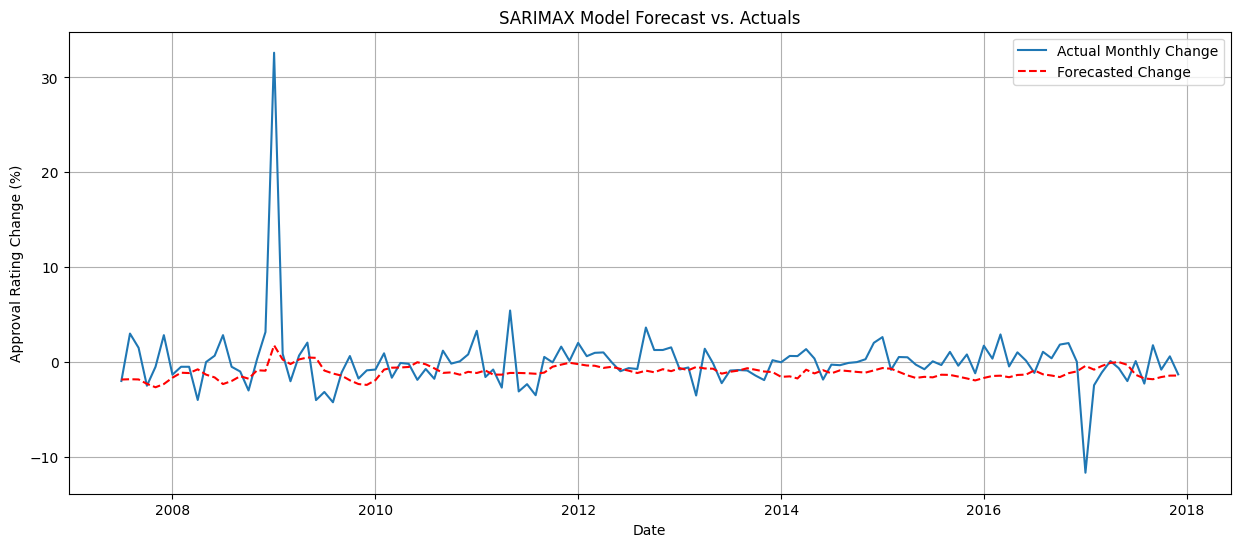

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual Monthly Change')
plt.plot(predicted_mean.index, predicted_mean, color='red', linestyle='--', label='Forecasted Change')
plt.title('SARIMAX Model Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Approval Rating Change (%)')
plt.legend()
plt.grid(True)
plt.show()

In [54]:


rmse = np.sqrt(mean_squared_error(y_test, predicted_mean))
print(f'\nModel RMSE: {rmse:.4f}')


Model RMSE: 3.5668


<h3>Built with election result</h3>

In [55]:
df_midterm = pd.read_csv("midterm_elections_1942_to_2022.csv")


df_midterm['House_Seat_Change'] = df_midterm['House seats'].str.split(':').str[0]

df_midterm['House_Seat_Change'] = pd.to_numeric(df_midterm['House_Seat_Change'])


midterm_data_clean = df_midterm[['Year', 'House_Seat_Change']].copy()


midterm_data_clean.head()

,Year,House_Seat_Change
0,1946,-54
1,1954,-18
2,1962,-4
3,1966,-47
4,1970,-12


<h4>Merger with previous forecase dataset</h4>

In [56]:
# Ensure 'final_data' has a 'Year' column for merging
if 'Year' not in final_data.columns:
    final_data['Year'] = final_data.index.year

# Create a helper function to get the average approval (Aug-Oct)
def get_avg_approval(year):
    # Filter for the specific year and months 8, 9, 10
    approval_period = final_data[
        (final_data['Year'] == year) &
        (final_data.index.month >= 8) &
        (final_data.index.month <= 10)
    ]['Approve']
    
    # Calculate the mean if data exists, otherwise return NaN
    if not approval_period.empty:
        return approval_period.mean()
    else:
        return np.nan

# Apply the function to create your 'X' feature
midterm_data_clean['Avg_Approval_Aug_Oct'] = midterm_data_clean['Year'].apply(get_avg_approval)

# Clean up: Drop rows with no approval data (like 1946)
midterm_data_clean.dropna(inplace=True)
midterm_data_clean.to_csv('final_regression_data.csv', index=False)

print("\n--- Step 2: Your FINAL Regression Dataset (Ready for Model) ---")
print(midterm_data_clean)


--- Step 2: Your FINAL Regression Dataset (Ready for Model) ---
    Year  House_Seat_Change  Avg_Approval_Aug_Oct
1   1954                -18             63.333333
2   1962                 -4             63.000000
3   1966                -47             46.250000
4   1970                -12             55.000000
5   1974                -48             52.333333
6   1978                -15             44.555556
7   1982                -26             41.111111
8   1990                 -8             66.131746
9   1994                -54             41.888889
10  2002                  8             65.600000
11  2010                -63             44.711470


<h3>The regression Model </h3>

In [57]:
import statsmodels.api as sm





Y = midterm_data_clean['House_Seat_Change']
X = midterm_data_clean['Avg_Approval_Aug_Oct']

# We must add a constant (the 'b' in y=mx+b) for the statsmodels library
X = sm.add_constant(X) 


# We use 'sm.OLS' (Ordinary Least Squares) for its great summary table
model_ols = sm.OLS(Y, X).fit()

# --- 3. Print the Results (This is a key part of your report) ---
print("\n--- Final Regression Model Summary ---")
print(model_ols.summary())




--- Final Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:      House_Seat_Change   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     9.840
Date:                Sat, 25 Oct 2025   Prob (F-statistic):             0.0120
Time:                        06:11:13   Log-Likelihood:                -45.648
No. Observations:                  11   AIC:                             95.30
Df Residuals:                       9   BIC:                             96.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

C:\Users\ADITYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


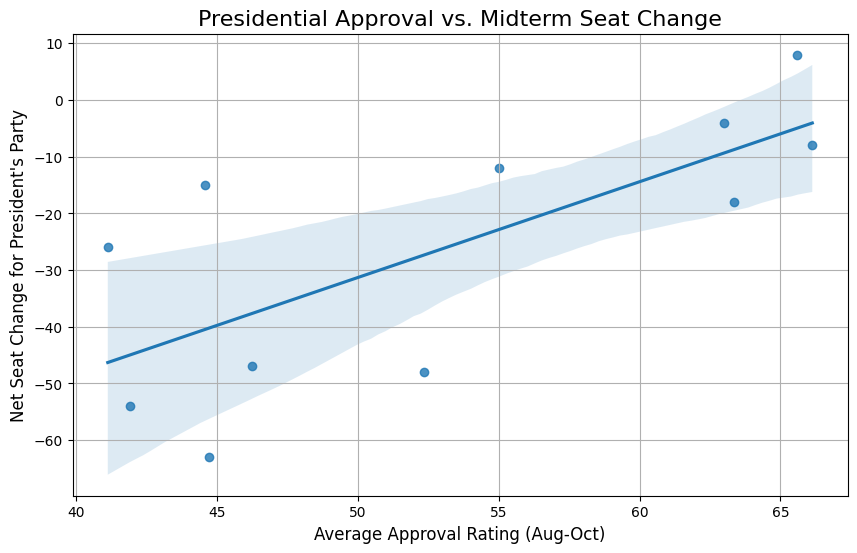

In [58]:
# --- 4. Plot the Results (This is the key chart for your PPT) ---
plt.figure(figsize=(10, 6))
# 'regplot' (regression plot) automatically plots the data and the regression line
sns.regplot(x='Avg_Approval_Aug_Oct', y='House_Seat_Change', data=midterm_data_clean)

plt.title('Presidential Approval vs. Midterm Seat Change', fontsize=16)
plt.xlabel('Average Approval Rating (Aug-Oct)', fontsize=12)
plt.ylabel('Net Seat Change for President\'s Party', fontsize=12)
plt.grid(True)
plt.show()